
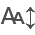

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [1]:
import duckdb
import pandas as pd
import numpy as np
from itables import init_notebook_mode, show

# 0) init
init_notebook_mode(all_interactive=True)
con = duckdb.connect()

# 1) query all “destruction” captions
q = """
SELECT
  *
FROM read_parquet('../data/blip_captioned_images.parquet')
WHERE lower(caption) LIKE '%rubble%'
   OR lower(caption) LIKE '%destr%'
   OR lower(caption) LIKE '%ruin%'
   OR lower(caption) LIKE '%devast%'
   OR lower(caption) LIKE '%demolish%'
   OR lower(caption) LIKE '%crater%'
"""
df_hits = con.execute(q).df()

# 2) fill any nulls so string ops won’t break
# df_hits['caption'] = df_hits['caption'].fillna('')

df_hits

In [2]:
from transformers import pipeline

# 1) Load the QA pipeline
qa = pipeline(
    "question-answering",
    model="distilbert-base-cased-distilled-squad",
    tokenizer="distilbert-base-cased-distilled-squad"
)

# 2) Pick one of your captions as the “context”
context = "People inspect the remains of a destroyed building following Israeli bombardment in Khan Yunis in the southern Gaza Strip on October 18, 2023."

# 3) Ask your questions
questions = [
    "Who caused the destruction?",
    "What was destroyed?",
    "Where did the destruction occur?"
]

for question in questions:
    result = qa(question=question, context=context)
    print(f"Q: {question}")
    print(f"A: {result['answer']}  (score: {result['score']:.2f})\n")


/mnt/raid1/MSCs/AY2425/skaul/miniconda3/envs/bias-analysis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


Q: Who caused the destruction?
A: Israeli  (score: 0.78)

Q: What was destroyed?
A: building  (score: 0.48)

Q: Where did the destruction occur?
A: Khan Yunis in the southern Gaza Strip  (score: 0.43)



In [1]:
import pandas as pd
from transformers import pipeline

# 1) Load & filter
df = pd.read_parquet(
    "../data/blip_captioned_images.parquet",
    columns=["image_id","article_id","source_domain","caption"]
).fillna("")
mask = df.caption.str.contains(r"rubble|destr|ruin|devast|demolish|crater|bomb",
                               case=False, na=False)
df = df[mask].reset_index(drop=True)

# 2) QA pipeline on GPU
qa = pipeline(
    "question-answering",
    model="distilbert-base-cased-distilled-squad",
    tokenizer="distilbert-base-cased-distilled-squad",
    device=0,
)

questions = {
    "agent":    "Who caused the destruction?",
    "location": "Where did the destruction occur?"
}

meta_inputs = []
qa_inputs   = []

for _, row in df.iterrows():
    for qkey, qtext in questions.items():
        meta_inputs.append({
            "image_id":      row.image_id,
            "article_id":    row.article_id,
            "source_domain": row.source_domain,
            "caption":       row.caption,
            "question_key":  qkey
        })
        qa_inputs.append({
            "question": qtext,
            "context":  row.caption
        })

# 3) Run QA in batches
qa_results = qa(qa_inputs, batch_size=32)

# 4) Combine metadata + QA outputs
records = []
for meta, out in zip(meta_inputs, qa_results):
    rec = {
        "image_id":      meta["image_id"],
        "article_id":    meta["article_id"],
        "source_domain": meta["source_domain"],
        "caption":       meta["caption"],
        meta["question_key"]: out["answer"]
    }
    records.append(rec)

# 5) Pivot wide, including caption
df_long = pd.DataFrame(records)
df_wide = (
    df_long
    .groupby(
        ["image_id","article_id","source_domain","caption"], 
        as_index=False
    )
    .agg({"agent":"first","location":"first"})
)

df_wide.head()


/mnt/raid1/MSCs/AY2425/skaul/miniconda3/envs/bias-analysis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0
/mnt/raid1/MSCs/AY2425/skaul/miniconda3/envs/bias-analysis/lib/python3.10/site-packages/transformers/pipelines/question_answering.py:395: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


,image_id,article_id,source_domain,caption,agent,location
0,0001133c-c3b6-420b-9b62-e661fb9b8a13,dce9801d-9941-4a60-921f-57db4a76757c,cnn.com,This aerial view shows displaced Palestinians ...,Palestinians,Jabalya refugee camp in northern Gaza
1,0002b1fe-6213-4449-969a-64ce0b33dfac,a5e099ed-a75d-417d-89e0-18be92b5bd93,apnews.com,Palestinians inspect the rubble of the Yassin ...,Israeli,Gaza City
2,0006f8d6-28b9-49c9-bcd7-3aa750e05082,091d06ae-f8b8-492b-98e7-087434dbf494,newsweek.com,A member of a bomb disposal unit inspects the ...,A member of a bomb disposal unit,Ramat Gan
3,000d8640-e687-4df6-821d-a3b72cf8725b,e339d702-0927-4d79-86b1-aeca53e4d8c0,apnews.com,Palestinians displaced by the Israeli bombardm...,Israeli,Rafah
4,0035b633-352f-46f1-b2f3-2ead090132fd,dd28f09f-37cd-43a8-a932-ca4d87d63e15,apnews.com,FILE - Palestinians bury the bodies of their r...,Israeli,Gaza Strip


In [2]:
# your df_wide is assumed to exist with columns: agent, location

# 1) Define keyword sets
location_israel = ['israel','tel aviv']
location_gaza   = ['gaza','rafah','khan yunis','west bank','palestin','jabalia','khan younis','jabaliya']
agent_israel    = ['israel','idf']
agent_gaza      = ['palestin','gaza','hamas']

# 2) Helper to assign a label from keyword list
def label_from_list(value, keywords, label):
    val = value.lower() if isinstance(value, str) else ''
    return label if any(k in val for k in keywords) else None

# 3) Compute `agent_label`
df_wide['agent_label'] = df_wide['agent'].apply(
    lambda x: 
        label_from_list(x, agent_israel, 'Israel')
        or label_from_list(x, agent_gaza, 'Palestine')
        or 'Other'
)

# 4) Compute `location_label`
df_wide['location_label'] = df_wide['location'].apply(
    lambda x: 
        label_from_list(x, location_israel, 'Israel')
        or label_from_list(x, location_gaza, 'Palestine')
        or 'Other'
)

# 5) Inspect
df_wide.head()


,image_id,article_id,source_domain,caption,agent,location,agent_label,location_label
0,0001133c-c3b6-420b-9b62-e661fb9b8a13,dce9801d-9941-4a60-921f-57db4a76757c,cnn.com,This aerial view shows displaced Palestinians ...,Palestinians,Jabalya refugee camp in northern Gaza,Palestine,Palestine
1,0002b1fe-6213-4449-969a-64ce0b33dfac,a5e099ed-a75d-417d-89e0-18be92b5bd93,apnews.com,Palestinians inspect the rubble of the Yassin ...,Israeli,Gaza City,Israel,Palestine
2,0006f8d6-28b9-49c9-bcd7-3aa750e05082,091d06ae-f8b8-492b-98e7-087434dbf494,newsweek.com,A member of a bomb disposal unit inspects the ...,A member of a bomb disposal unit,Ramat Gan,Other,Other
3,000d8640-e687-4df6-821d-a3b72cf8725b,e339d702-0927-4d79-86b1-aeca53e4d8c0,apnews.com,Palestinians displaced by the Israeli bombardm...,Israeli,Rafah,Israel,Palestine
4,0035b633-352f-46f1-b2f3-2ead090132fd,dd28f09f-37cd-43a8-a932-ca4d87d63e15,apnews.com,FILE - Palestinians bury the bodies of their r...,Israeli,Gaza Strip,Israel,Palestine


In [3]:
# Count where both location_label and agent_label are 'Other'
both_other_count = df_wide[
    (df_wide['location_label'] == 'Other') & 
    (df_wide['agent_label'] == 'Other')
].shape[0]

print(f"Count where both location_label and agent_label are 'Other': {both_other_count}")

# For more detail, show the crosstab between agent_label and location_label
crosstab = pd.crosstab(df_wide['agent_label'], df_wide['location_label'], margins=True)
print(f"\nCrosstab of agent_label vs location_label:")
print(crosstab)

Count where both location_label and agent_label are 'Other': 1106

Crosstab of agent_label vs location_label:
location_label  Israel  Other  Palestine   All
agent_label                                   
Israel             247   1051       3630  4928
Other              157   1106        932  2195
Palestine          174    400        867  1441
All                578   2557       5429  8564


In [4]:
# Filter rows where both agent_label and location_label are either 'Israel' or 'Palestine'
# but also add a condition to exclude rows where they are different
consistent_mask = (
    ((df_wide['agent_label'] == 'Israel') & (df_wide['location_label'] == 'Israel')) |
    ((df_wide['agent_label'] == 'Palestine') & (df_wide['location_label'] == 'Palestine'))
)

consistent_rows = df_wide[consistent_mask]

print(f"Rows where agent_label and location_label are consistently 'Israel' or 'Palestine': {len(consistent_rows)}")

# Show breakdown by combination
print("\nBreakdown:")
print(f"Israel agent + Israel location: {((df_wide['agent_label'] == 'Israel') & (df_wide['location_label'] == 'Israel')).sum()}")
print(f"Palestine agent + Palestine location: {((df_wide['agent_label'] == 'Palestine') & (df_wide['location_label'] == 'Palestine')).sum()}")

consistent_rows

Rows where agent_label and location_label are consistently 'Israel' or 'Palestine': 1114

Breakdown:
Israel agent + Israel location: 247
Palestine agent + Palestine location: 867


,image_id,article_id,source_domain,caption,agent,location,agent_label,location_label
0,0001133c-c3b6-420b-9b62-e661fb9b8a13,dce9801d-9941-4a60-921f-57db4a76757c,cnn.com,This aerial view shows displaced Palestinians ...,Palestinians,Jabalya refugee camp in northern Gaza,Palestine,Palestine
7,005396ac-469b-46db-bf26-f6ac80023f1a,47669fa2-4e63-4a98-ae2c-636632803041,nypost.com,Israel continues to bombard Hamas bases to put...,Israel,Israel,Israel,Israel
10,006810bd-9cc5-4b38-98c9-02ee6101baaa,973adfe0-a2cb-4242-8245-e22c4ab203a2,dailymail.co.uk,Sources said Israel is asking the United State...,Israel,Israel,Israel,Israel
13,00830688-9748-4b0d-9a30-010f47405e79,d23837e4-f63f-4e18-80f3-4c28c57835a0,dailymail.co.uk,Hamas terrorists have celebrated their ceasefi...,Hamas terrorists,streets of Gaza,Palestine,Palestine
23,00b94f58-d04a-49f4-805b-5e7e8ff681b1,636ae74b-3950-4a33-b3db-a7f2d1925304,apnews.com,Palestinians pull a body out of the rubble of ...,Palestinians,"Maghazi refugee camp, central Gaza Strip",Palestine,Palestine
...,...,...,...,...,...,...,...,...
8537,fefe9978-e285-43a6-b284-0f5a60601cb9,85b20b32-b5a4-4efc-adf4-5757d03cd8e7,usatoday.com,Fire and smoke rises above buildings during an...,Hamas,Gaza City,Palestine,Palestine
8547,ff686d7e-5256-4fd6-ac4b-9098488fdabc,1f286ce7-5095-4684-9ff9-861239e56ee8,theguardian.com,Palestinians in Gaza search the rubble of a re...,EPA Palestinians,Khan Younis,Palestine,Palestine
8551,ff8d83ca-ba58-4abe-a839-e8f606eb8410,aae78266-ddae-43c2-85af-6b7f9a4a670e,cnbc.com,Destroyed buildings lie in ruin in central Gaz...,Hamas,central Gaza,Palestine,Palestine
8554,ffa0a03c-fc52-467b-aecb-10b96930b974,db2f491f-274a-4ba8-857f-d7e602b81010,dailymail.co.uk,Palestinian children mourn relatives killed in...,Palestinian children mourn relatives,Gaza Strip,Palestine,Palestine


In [5]:
# Filter to show rows where both agent_label and location_label are 'Other'
both_other_rows = df_wide[
    (df_wide['agent_label'] == 'Other') & 
    (df_wide['location_label'] == 'Other')
]

print(f"Rows where both agent_label and location_label are 'Other': {len(both_other_rows)}")
print("\nSample of these rows:")
both_other_rows.head(10)

Rows where both agent_label and location_label are 'Other': 1106

Sample of these rows:


,image_id,article_id,source_domain,caption,agent,location,agent_label,location_label
2,0006f8d6-28b9-49c9-bcd7-3aa750e05082,091d06ae-f8b8-492b-98e7-087434dbf494,newsweek.com,A member of a bomb disposal unit inspects the ...,A member of a bomb disposal unit,Ramat Gan,Other,Other
16,0096399e-886d-4bf1-aab7-e3ec8b073880,48074feb-72b0-4a08-9d70-b034773a46de,dailymail.co.uk,Charities have lost contact with their aid wor...,aid workers,Charities,Other,Other
30,00e4dd87-522f-4dd7-b94a-60596662ea4d,4fe4561e-48cc-4c16-b95e-60656e47be6e,express.co.uk,Biden has called on Netanyahu to hold back as ...,Biden,Netanyahu,Other,Other
40,012a4545-e9de-464c-9f1b-9b8177a81393,cbc1a9d0-357f-4f09-9a44-02c90d854083,dailymail.co.uk,'The walls stay intact. There are no craters i...,Hagari,tarmac,Other,Other
42,012c8c9f-f039-44b2-ac6e-ad3eac3643a6,311bc40a-429e-4370-b4cf-3b97c51f6613,dailymail.co.uk,Devastated father Thomas Hand tearfully recall...,father Thomas Hand,father,Other,Other
45,0139b928-da42-4beb-8888-534427d643d3,0ce2cf17-c84f-40e3-a9e7-79cb2e5ca270,foxnews.com,This image provided by the U.S. Navy shows the...,the U.S. Navy,Mediterranean Sea,Other,Other
51,0187034f-f1cf-4107-b554-0bf29ec5abb2,4c02dee8-7d0f-4bf6-8628-b79ea966fc60,nypost.com,A United Hatzalah volunteer stands in front of...,United Hatzalah volunteer,a house,Other,Other
52,0187f606-83f2-4246-905f-0990374ca043,134b1483-6b24-4218-8842-3d1d53f7739a,dailymail.co.uk,Residents look at the wreckage of destroyed ve...,rocket attack,Ashkelon,Other,Other
56,01ab974d-c7a8-4bc8-bebd-82ce37db774f,59c47b43-15fb-4cc6-83d5-090fcbc8c35f,bbc.com,"Image caption, The interior of a ruined house",Image caption,The interior of a ruined house,Other,Other
57,01bd6a7e-cd5a-4349-bbf3-277f78677577,652e5cc4-96f1-4501-937f-d4662f32fd5c,theguardian.com,Huda prepares coffee in her kitchen in Babliye...,Her family,Babliyeh,Other,Other


In [6]:
# Create a new dataframe filtering out cases where both labels are 'Other'
destroyed_df = df_wide[~((df_wide['agent_label'] == 'Other') & (df_wide['location_label'] == 'Other'))].copy()

print(f"Original df_wide shape: {df_wide.shape}")
print(f"Filtered destroyed_df shape: {destroyed_df.shape}")
print(f"Removed {df_wide.shape[0] - destroyed_df.shape[0]} rows where both labels were 'Other'")

# Show the distribution of labels in the new dataframe
print(f"\nCrosstab of agent_label vs location_label in destroyed_df:")
crosstab_destroyed = pd.crosstab(destroyed_df['agent_label'], destroyed_df['location_label'], margins=True)
print(crosstab_destroyed)

destroyed_df.head()

Original df_wide shape: (8564, 8)
Filtered destroyed_df shape: (7458, 8)
Removed 1106 rows where both labels were 'Other'

Crosstab of agent_label vs location_label in destroyed_df:
location_label  Israel  Other  Palestine   All
agent_label                                   
Israel             247   1051       3630  4928
Other              157      0        932  1089
Palestine          174    400        867  1441
All                578   1451       5429  7458


,image_id,article_id,source_domain,caption,agent,location,agent_label,location_label
0,0001133c-c3b6-420b-9b62-e661fb9b8a13,dce9801d-9941-4a60-921f-57db4a76757c,cnn.com,This aerial view shows displaced Palestinians ...,Palestinians,Jabalya refugee camp in northern Gaza,Palestine,Palestine
1,0002b1fe-6213-4449-969a-64ce0b33dfac,a5e099ed-a75d-417d-89e0-18be92b5bd93,apnews.com,Palestinians inspect the rubble of the Yassin ...,Israeli,Gaza City,Israel,Palestine
3,000d8640-e687-4df6-821d-a3b72cf8725b,e339d702-0927-4d79-86b1-aeca53e4d8c0,apnews.com,Palestinians displaced by the Israeli bombardm...,Israeli,Rafah,Israel,Palestine
4,0035b633-352f-46f1-b2f3-2ead090132fd,dd28f09f-37cd-43a8-a932-ca4d87d63e15,apnews.com,FILE - Palestinians bury the bodies of their r...,Israeli,Gaza Strip,Israel,Palestine
5,003e2ca0-02c5-466f-8b7b-03ecd77c08b5,f6a85f74-ed40-40ea-bcd6-5b163debc40f,apnews.com,FILE - The Commissioner-General of the U.N. ag...,Israel,Gaza,Israel,Palestine


In [7]:
# Create destruction_location_label using the specified logic
def assign_destruction_location_label(row):
    location_label = row['location_label']
    agent_label = row['agent_label']
    
    # First check location directly
    if location_label == 'Israel':
        return 'Israel'
    elif location_label == 'Palestine':
        return 'Palestine'
    
    # If location is 'Other', check agent
    elif location_label == 'Other':
        if agent_label == 'Israel':
            return 'Palestine'
        elif agent_label == 'Palestine':
            return 'Israel'
        else:
            return 'Other'
    
    # Default case
    return 'Other'

destroyed_df['destruction_location_label'] = destroyed_df.apply(assign_destruction_location_label, axis=1)

# Show the distribution
print("Distribution of destruction_location_label:")
print(destroyed_df['destruction_location_label'].value_counts())
print(f"\nCrosstab of destruction_location_label vs location_label:")
print(pd.crosstab(destroyed_df['destruction_location_label'], destroyed_df['location_label'], margins=True))

Distribution of destruction_location_label:
destruction_location_label
Palestine    6480
Israel        978
Name: count, dtype: int64

Crosstab of destruction_location_label vs location_label:
location_label              Israel  Other  Palestine   All
destruction_location_label                                
Israel                         578    400          0   978
Palestine                        0   1051       5429  6480
All                            578   1451       5429  7458


Percentage breakdown by source domain:
destruction_location_label  Israel  Palestine
source_domain                                
abcnews.go.com                 8.5       91.5
apnews.com                     6.9       93.1
bbc.com                       14.9       85.1
cnbc.com                       7.1       92.9
cnn.com                        8.2       91.8
dailymail.co.uk               16.1       83.9
express.co.uk                 26.2       73.8
foxnews.com                   20.1       79.9
hindustantimes.com            14.9       85.1
independent.co.uk             14.7       85.3
india.com                     21.7       78.3
indianexpress.com              8.8       91.2
news18.com                    15.8       84.2
newsweek.com                  10.5       89.5
nypost.com                    18.7       81.3
theguardian.com                7.0       93.0
thesun.co.uk                  17.2       82.8
usatoday.com                   7.2       92.8


<Figure size 1200x800 with 0 Axes>

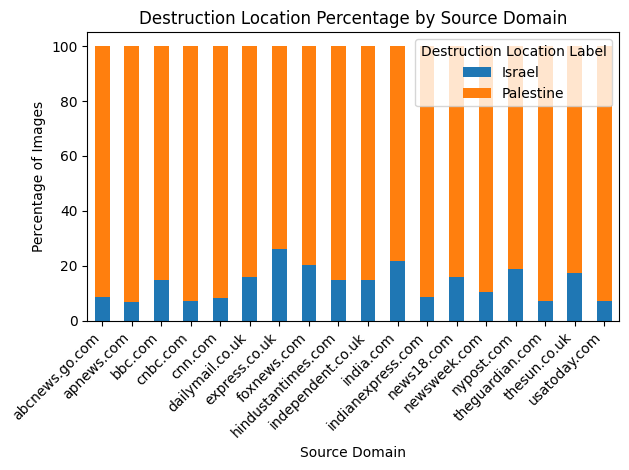

In [9]:
# Filter out rows where both agent_label and location_label are 'Other'
viz_data_filtered = destroyed_df[~((destroyed_df['agent_label'] == 'Other') & (destroyed_df['location_label'] == 'Other'))].copy()

# Calculate percentages for each source domain
viz_data_filtered_grouped = viz_data_filtered.groupby(['source_domain', 'destruction_location_label']).size().reset_index(name='count')
viz_data_filtered_totals = viz_data_filtered.groupby('source_domain').size().reset_index(name='total')

# Merge to get percentages
viz_data_percentages = viz_data_filtered_grouped.merge(viz_data_filtered_totals, on='source_domain')
viz_data_percentages['percentage'] = (viz_data_percentages['count'] / viz_data_percentages['total']) * 100

# Pivot to get Israel and Palestine columns
percentage_pivot = viz_data_percentages.pivot(index='source_domain', columns='destruction_location_label', values='percentage').fillna(0)

print("Percentage breakdown by source domain:")
print(percentage_pivot.round(1))

# Create stacked bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = percentage_pivot.plot(kind='bar', stacked=True)
plt.title('Destruction Location Percentage by Source Domain')
plt.xlabel('Source Domain')
plt.ylabel('Percentage of Images')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Destruction Location Label')
plt.tight_layout()
plt.show()


Original viz_data_filtered shape: (7458, 9)
After dropping duplicates on article_id: (4981, 9)
Removed 2477 duplicate articles

Percentage breakdown by source domain (unique articles only):
destruction_location_label  Israel  Palestine
source_domain                                
abcnews.go.com                 7.1       92.9
apnews.com                     6.9       93.1
bbc.com                       15.0       85.0
cnbc.com                       7.1       92.9
cnn.com                        7.6       92.4
dailymail.co.uk               18.9       81.1
express.co.uk                 27.0       73.0
foxnews.com                   21.3       78.7
hindustantimes.com            14.9       85.1
independent.co.uk             15.3       84.7
india.com                     21.7       78.3
indianexpress.com              8.8       91.2
news18.com                    15.8       84.2
newsweek.com                   9.7       90.3
nypost.com                    18.9       81.1
theguardian.com             

<Figure size 1200x800 with 0 Axes>

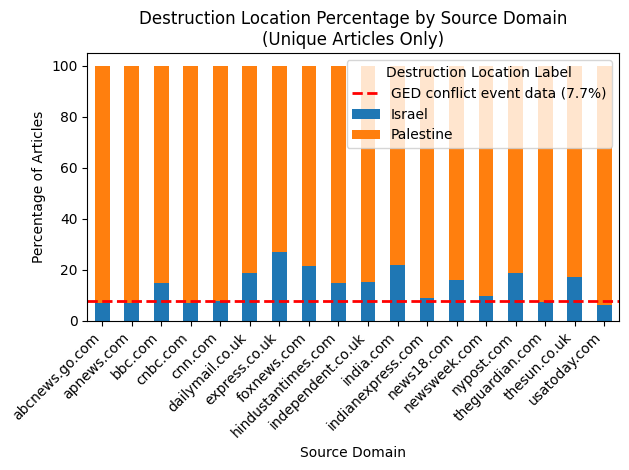

In [10]:
# Create a new dataframe dropping duplicates on article_id
viz_data_filtered_unique = viz_data_filtered.drop_duplicates(subset=['article_id'])

print(f"Original viz_data_filtered shape: {viz_data_filtered.shape}")
print(f"After dropping duplicates on article_id: {viz_data_filtered_unique.shape}")
print(f"Removed {viz_data_filtered.shape[0] - viz_data_filtered_unique.shape[0]} duplicate articles")

# Calculate percentages for each source domain using unique articles
viz_data_unique_grouped = viz_data_filtered_unique.groupby(['source_domain', 'destruction_location_label']).size().reset_index(name='count')
viz_data_unique_totals = viz_data_filtered_unique.groupby('source_domain').size().reset_index(name='total')

# Merge to get percentages
viz_data_unique_percentages = viz_data_unique_grouped.merge(viz_data_unique_totals, on='source_domain')
viz_data_unique_percentages['percentage'] = (viz_data_unique_percentages['count'] / viz_data_unique_percentages['total']) * 100

# Pivot to get Israel and Palestine columns
percentage_pivot_unique = viz_data_unique_percentages.pivot(index='source_domain', columns='destruction_location_label', values='percentage').fillna(0)

print("\nPercentage breakdown by source domain (unique articles only):")
print(percentage_pivot_unique.round(1))

# Create stacked bar chart
plt.figure(figsize=(12, 8))
ax = percentage_pivot_unique.plot(kind='bar', stacked=True)
plt.title('Destruction Location Percentage by Source Domain\n(Unique Articles Only)')
plt.xlabel('Source Domain')
plt.ylabel('Percentage of Articles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Destruction Location Label')

# Add vertical line at 7.7% for GED conflict event data
plt.axhline(y=7.7, color='red', linestyle='--', linewidth=2, label='GED conflict event data (7.7%)')
plt.legend(title='Destruction Location Label')

plt.tight_layout()
plt.show()


In [ ]:
ged = pd.read_csv("../data/GEDEvent_v25_1.csv", low_memory=False)


In [ ]:
ged['date_start']

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [ ]:

# import pandas as pd
# import matplotlib.pyplot as plt

# # 1) Load GED events
# # ged = pd.read_csv("../data/GEDEvent_v25_1.csv", low_memory=False)

# # 2) Parse & filter dates
# ged = ged[(ged['year'] >= 2023) & (ged['year'] <= 2025)]

# # Filter for Israel
# ged = ged[ged['country'] == 'Israel']
# ged = ged[ged['conflict_name'] == 'Israel: Palestine']
# israel_areas = [
#     "Tel Aviv",
#     "Sderot",
#     "Ashkelon",
#     "Kibbutz Reim Festival Site",
#     "Kibbutz Beeri",
#     "Kissufim Kibbutz",
#     "Holit Settlement",
#     "Netiv HaAsara Settlement",
#     "Karm Abu Salem Border Crossing",
#     "Gush Etzion Settlement",
#     "Ofakim",
#     "Kefar Aza",
#     "Ma'on",
#     "Rehovot",
#     "Shokeda",
#     "Kiryat Shmona",
#     "Zikim Kibbutz",
#     "Jaffa",
#     "Northern Israel",
#     "Northern District",
#     "Southern District",
#     "Kerem Shalom Army Post",
#     "Israel/Egypt Border in Gaza"
# ]

# # Filter for relevant locations - Israel areas
# israel_ged = ged[ged['where_description'].str.contains('|'.join(israel_areas), case=False, na=False)]

# print(f"GED events in Israel areas: {len(israel_ged)}")
# print(f"Unique locations: {israel_ged['where_description'].unique()[:10]}")  # Show first 10

# # Create conflict_location column
# def assign_conflict_location(location):
#     if pd.isna(location):
#         return 'Palestine'
#     location_lower = str(location).lower()
#     for area in israel_areas:
#         if area.lower() in location_lower:
#             return 'Israel'
#     return 'Palestine'

# ged['conflict_location'] = ged['where_description'].apply(assign_conflict_location)

# print(f"\nConflict location distribution:")
# print(ged['conflict_location'].value_counts())

# # Create percentage breakdown for conflict events by location
# ged_grouped = ged.groupby('conflict_location').size().reset_index(name='count')
# ged_total = len(ged)
# ged_grouped['percentage'] = (ged_grouped['count'] / ged_total) * 100

# print("GED Events - Conflict Location Percentage:")
# print(ged_grouped)

# # Create bar chart
# plt.figure(figsize=(10, 6))
# bars = plt.bar(ged_grouped['conflict_location'], ged_grouped['percentage'], 
#                color=['#1f77b4', '#ff7f0e'])
# plt.title('GED Conflict Events by Location (2023-2025)\nIsrael vs Palestine')
# plt.xlabel('Conflict Location')
# plt.ylabel('Percentage of Events (%)')
# plt.ylim(0, 100)

# # Add percentage labels on bars
# for bar, pct in zip(bars, ged_grouped['percentage']):
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
#              f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# plt.tight_layout()
# plt.show()



Event counts by location:
conflict_location
Palestine    3872
Israel        322
Name: count, dtype: int64

Percentages:
conflict_location
Palestine    92.3%
Israel        7.7%
Name: count, dtype: object


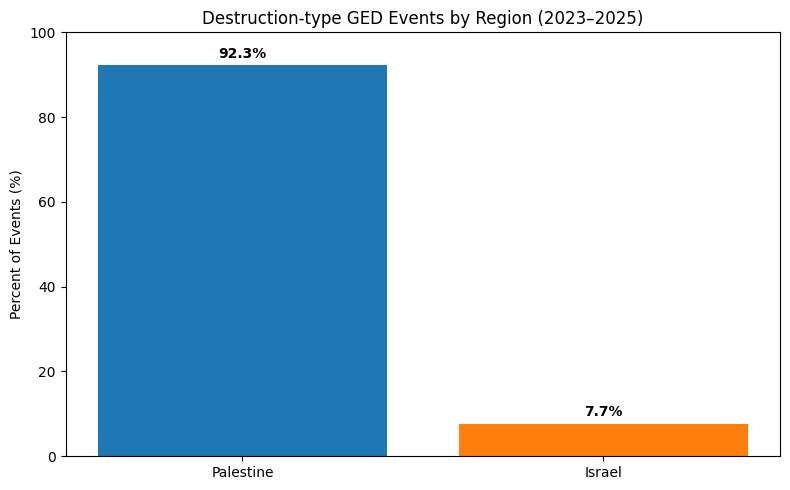

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load & date‐filter your GED export
ged = pd.read_csv("../data/GEDEvent_v25_1.csv", low_memory=False)
ged = ged[(ged['year'] >= 2023) & (ged['year'] <= 2025)]

# 2) Broaden your event‐type filter (optional but recommended)
DESTRUCT_TYPES = [
    "Remote violence",
    "Violence against civilians",
    "Battles",
    "One-sided violence"
]
# ged = ged[ged['country'] == 'Israel']
ged = ged[ged['conflict_name'] == 'Israel: Palestine']

# 3) Define bounding boxes (approximate)  
#    – Gaza Strip: lat 31.1–31.6, lon 34.2–34.6  
#    – Israel proper: lat 29.0–33.3, lon 34.2–35.9  
def assign_conflict_location_by_coords(lat, lon):
    # Gaza Strip box
    if 31.1 <= lat <= 31.6 and 34.2 <= lon <= 34.6:
        return "Palestine"
    # Israel box
    if 29.0 <= lat <= 33.3 and 34.2 <= lon <= 35.9:
        return "Israel"
    return None  # outside study area

# 4) Apply it
ged["conflict_location"] = ged.apply(
    lambda row: assign_conflict_location_by_coords(row.latitude, row.longitude),
    axis=1
)
ged = ged[ged["conflict_location"].notna()]

# 5) Compute distribution
counts = ged["conflict_location"].value_counts()
total  = counts.sum()
pct    = (counts / total * 100).round(1)

print("Event counts by location:")
print(counts)
print("\nPercentages:")
print(pct.astype(str) + "%")

# 6) Plot
plt.figure(figsize=(8,5))
bars = plt.bar(
    pct.index, pct.values,
    color=["#1f77b4", "#ff7f0e"]
)
plt.title("Destruction‐type GED Events by Region (2023–2025)")
plt.ylabel("Percent of Events (%)")
plt.ylim(0, 100)
for bar, val in zip(bars, pct.values):
    plt.text(
        bar.get_x() + bar.get_width()/2, val + 1,
        f"{val:.1f}%", ha="center", va="bottom", fontweight="bold"
    )
plt.tight_layout()
plt.show()


In [ ]:
destroyed_df

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [ ]:
import pandas as pd
from scipy.stats import chisquare

# 0) Your DataFrame
df = destroyed_df.copy()   # or df_wide, etc.

# 1) GED baseline proportions
p_israel    = 0.077
p_palestine = 0.923

def chi_for(src):
    sub = df[df['source_domain'] == src]
    # Restrict to just the two labels
    sub = sub[sub['destruction_location_label'].isin(['Israel','Gaza'])]
    obs_isr = (sub['destruction_location_label']=="Israel").sum()
    obs_pal = (sub['destruction_location_label']=="Gaza").sum()
    N       = obs_isr + obs_pal
    if N == 0:
        return pd.Series({
            'N':0, 'obs_israel':0, 'obs_gaza':0,
            'exp_israel':0, 'exp_gaza':0,
            'chi2':None, 'p_value':None
        })
    # Now expected sums to N exactly
    exp_isr = p_israel * N
    exp_pal = p_palestine * N
    chi2, p = chisquare(
        f_obs=[obs_isr, obs_pal],
        f_exp=[exp_isr, exp_pal]
    )
    return pd.Series({
        'N':N,
        'obs_israel':obs_isr,
        'obs_gaza':obs_pal,
        'exp_israel':exp_isr,
        'exp_gaza':exp_pal,
        'chi2':chi2,
        'p_value':p
    })

# 2) Run per source_domain
sources = df['source_domain'].unique()
results = pd.DataFrame([chi_for(src) for src in sources], index=sources)
results.index.name = 'source_domain'
results = results.reset_index()

display(results)


Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [30]:
# Get 100 random rows from destroyed_df
sample_df = destroyed_df.sample(n=100, random_state=42)
sample_df

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [31]:
for i, caption in enumerate(sample_df['caption'], 1):
    print(f"{i}. {caption}")

1. This picture taken on October 11, 2023 shows an aerial view of buildings destroyed by Israeli air strikes in the Jabalia camp for Palestinian refugees in Gaza
2. Palestinians observe the destruction caused by the attacks of Israeli army on tents of displaced Palestinians living near the United Nations Relief and Works Agency for Palestine Refugees (UNRWA) warehouses in Rafah, Gaza on May 27, 2024
3. An Israeli soldier walks by a house destroyed by Hamas militants in Kibbutz Be’eri on Wednesday, Oct. 11 ( AP )
4. People gather by the rubble of a destroyed building following Israeli bombardment in Rafah in the southern Gaza Strip on Thursday
5. A melted television is seen inside a destroyed house in kibbutz Kfar Azza, Israel, near the Gaza Strip, Tuesday, Nov. 7, 2023. The kibbutz was attacked on Oct. 7 by Hamas militants, who killed and kidnapped members of its community. (AP Photo/Bernat Armangue)
6. Rubble litters a street between smoldering buildings hit by an Israeli airstrike in

In [43]:
caption_labels = {
    "This picture taken on October 11, 2023 shows an aerial view of buildings destroyed by Israeli air strikes in the Jabalia camp for Palestinian refugees in Gaza": "palestine",
    "Palestinians observe the destruction caused by the attacks of Israeli army on tents of displaced Palestinians living near the United Nations Relief and Works Agency for Palestine Refugees (UNRWA) warehouses in Rafah, Gaza on May 27, 2024": "palestine",
    "An Israeli soldier walks by a house destroyed by Hamas militants in Kibbutz Be’eri on Wednesday, Oct. 11 (AP)": "israel",
    "People gather by the rubble of a destroyed building following Israeli bombardment in Rafah in the southern Gaza Strip on Thursday": "palestine",
    "A melted television is seen inside a destroyed house in kibbutz Kfar Azza, Israel, near the Gaza Strip, Tuesday, Nov. 7, 2023. The kibbutz was attacked on Oct. 7 by Hamas militants, who killed and kidnapped members of its community. (AP Photo/Bernat Armangue)": "israel",
    "Rubble litters a street between smoldering buildings hit by an Israeli airstrike in Jabaliya, Gaza Strip, Wednesday, Oct. 11, 2023. (AP Photo/Hatem Moussa)": "palestine",
    "Netanyahu appeared to blame security and intelligence officials for failing to detect signs of Hamas’s devastating invasion": "israel",
    "A man checks a destroyed warehouse, destroyed by an Israeli strike, at an industrial district in the southern coastal town of Ghazieh, Lebanon, Monday, Feb. 19, 2024. (AP Photo/Mohammed Zaatari)": "palestine",
    "Palestinians hang decorations next to their destroyed homes in preparation for the holy month of Ramadan in Khan Younis, southern Gaza Strip, Friday, Feb. 28, 2025. (AP Photo/Jehad Alshrafi)": "palestine",
    "A building used by the Iranian embassy in Damascus, destroyed by an airstrike blamed on Israel (AFP via Getty Images)": "palestine",
    "Israeli Prime Minister Benjamin Netanyahu asked the Palestinians to leave Gaza, and warned that the army would turn Hamas positions ‘into rubble.’ Pictured: Gaza City, Gaza on Sunday": "palestine",
    "Israeli soldiers walk through rubble, amid the ongoing ground invasion against Palestinian Islamist group Hamas in the northern Gaza Strip, November 8, 2023": "palestine",
    "People inspect the damage and extract items from their homes in Hamad Town after their towers were destroyed by Israeli air strikes on March 17, 2024 in Khan Yunis, Gaza. Ahmad Hasaballah/Getty Images": "palestine",
    "Pictured: Palestinians evacuate a dead child from a building destroyed in the Israeli bombardment of the Gaza Strip in Rafah on Sunday": "palestine",
    "A view of the demolished residential area shows Palestinians continuing their daily lives under difficult conditions in the Bureij refugee camp": "israel",
    "A man is carried from the rubble of a collapsed building after Israeli bombardment in Jabaliya in the Gaza Strip on Tuesday. Photograph: Omar Al-Qattaa/AFP/Getty Images": "palestine",
    "A view of the remains of a mosque and houses destroyed by Israeli strikes in the central Gaza Strip": "palestine",
    "Palestinians walk through the destruction in the wake of an Israeli air and ground offensive in Khan Younis, southern Gaza Strip, Monday, April 8, 2024": "palestine",
    "Palestinians search for casualties under the rubble in the aftermath of Israeli strikes, amid the ongoing conflict between Israel and the Palestinian Islamist group Hamas, in Khan Younis in the southern Gaza Strip, October 14.": "palestine",
    "Palestinians wave their national flag and celebrate by a destroyed Israeli tank at the southern Gaza Strip fence east of Khan Younis on Saturday, Oct. 7, 2023. (AP Photo/Yousef Masoud)": "palestine",
    "A destroyed residential tower in Al Nuseirat refugee camp, Gaza Strip. Photograph: Mohammed Saber/EPA": "palestine",
    "Destruction in Rafah, in the Gaza Strip, after an Israeli airstrike. Photograph: Mohammad Jahjouh/AP": "palestine",
    "A United Nations (UN) team inspects the grounds of Al-Shifa, Gaza’s largest hospital, which was reduced to rubble by a two-week Israeli raid, on April 8, 2024.": "palestine",
    "Hamas’ plan resulted in the destruction of nearly all of Gaza and the deaths of tens of thousands of Palestinians.": "palestine",
    "An Israeli warship is pictured firing a missile during a test of the “C-Dome” defense system on February 21, 2022. Israel Defense Forces on Monday purportedly destroyed a drone fired by a group of Iran-backed…": "palestine",
    "A man stands on a house that was destroyed by an Israeli airstrike, in Hanine village, south Lebanon, Thursday, April 25, 2024. (AP Photo/Mohammed Zaatari)": "palestine",
    "Many Palestinians were left without electricity as they picked through rubble": "palestine",
    "Palestinians walk by the buildings destroyed in the Israeli bombardment on al-Zahra, on the outskirts of Gaza City. (AP)": "palestine",
    "Palestinians carry an injured man from the rubble of a collapsed building after an airstrike in Rafah, in the Gaza Strip (AP)": "palestine",
    "An Israeli police officer investigates a crater at the site of a missile attack, launched from Yemen, near Ben Gurion Airport, in Tel Aviv, Israel May 4, 2025. (REUTERS)": "israel",
    "People sit in the rubble of a residential building in the Gaza Strip on 22 April. Photograph: Mahmoud Issa/Reuters": "palestine",
    "A Palestinian woman cries in front of a destroyed building in the Al-Maghazi refugee camp in central Gaza Strip, on January 16": "palestine",
    "Palestinians look at the destruction after an Israeli airstrike on a crowded tent camp housing Palestinians displaced by the war in Muwasi, Gaza Strip, Tuesday, Sept. 10, 2024. An Israeli strike killed at least 40 people and wounded 60 others early Tuesday, Palestinian officials said. Israel said it targeted “significant” Hamas militants, allegations denied by the militant group. (AP Photo/Abdel Kareem Hana)": "palestine",
    "Palestinians look for survivors in the rubble of a building following Israeli bombing in Rafah in the southern Gaza Strip, on Oct. 31, 2023.": "palestine",
    "An aerial view Wednesday of buildings destroyed by Israeli air strikes in a camp for Palestinian refugees in Gaza City. (Yahya Hassouna/AFP via Getty Images)": "palestine",
    "A civil defense worker carries parts of a destroyed car following an Israeli drone strike in the southern town of Bazouriyeh, Lebanon, Jan. 20, 2024. Mohammad Zaatari/AP": "palestine",
    "A child walks in front of a completely destroyed building after Israeli attacks on Al-Shati refugee camp of Gaza City, Gaza on October 28, 2023 as Israeli attacks continue on the 22nd day on Gaza. Photograph: Anadolu Agency/Anadolu/Getty Images": "palestine",
    "Smoke billow from the site of an Israeli airstrike in Northern Gaza. Israel is currently waging another major operation in already-devastated northern Gaza, which has killed hundreds of Palestinians over the last two weeks, according to local health authorities": "palestine",
    "Palestinians search for casualties under the rubble in the aftermath of Israeli strikes in the southern Gaza Strip on October 13. (Image: REUTERS/Ibraheem Abu Mustafa)": "palestine",
    "People walk past destroyed buildings in the southern Gaza Strip city of Khan Younis.": "palestine",
    "An Israeli solider stands next to a destroyed building in Khan Younis, southern Gaza (via REUTERS)": "palestine",
    "The Palestinian Al-Naji family eats an iftar meal, the breaking of fast, amidst the ruins of their family house, on the first day of the Muslim holy fasting month of Ramadan, in Deir el-Balah in the central Gaza Strip, Mar. 11, 2024. AFP via Getty Images": "palestine",
    "Palestinians search the rubble as others evacuate a victim following an Israeli airstrike on buildings in Rafah, in the southern Gaza Strip on October 17, 2023": "palestine",
    "Airstrikes and ground operations by Israeli forces have caused widespread destruction in Gaza’s Jabalia refugee camp. Photograph: Haitham Imad/EPA": "palestine",
    "A Palestinian boy rides a donkey on the rubble of destroyed houses in the Rafah refugee camp in the southern Gaza Strip, on March 21, 2024": "palestine",
    "Palestinians look at the destruction after an Israeli strike where displaced people were staying in Rafah, Gaza Strip, Monday, May 27, 2024. (AP Photo/Jehad Alshrafi)": "palestine",
    "Palestinians gather around residential buildings destroyed in Israeli strikes in Zahra City on Thursday": "palestine",
    "Palestinians inspect the rubble of the Al-Lahham family’s home, destroyed by Israeli airstrikes in Khan Younis, Gaza Strip, on Thursday, May 15, 2025. (AP Photo/Abdel Kareem Hana)": "palestine",
    "A woman in Tel Aviv picks her way through rubble late on Saturday": "israel",
    "Palestinians walk through the destruction in the wake of an Israeli air and ground offensive in Khan Younis": "palestine",
    "Sharon Alony Cunio surveys the kitchen in the ruins of her home in Kibbutz Nir Oz on Monday, Jan. 15, 2024. Cunio, her husband and their 3-year-old twin daughters were kidnapped from the home by Hamas militants on Oct. 7, 2023. She and her daughters were released in November, but her husband remains in captivity. (AP Photo/Maya Alleruzzo)": "israel",
    "Rescuers pull a child from the rubble of a building following Israeli strikes in Khan Yunis in the southern Gaza Strip on Tuesday": "palestine",
    "FILE – Palestinians search for bodies and survivors in the rubble of a residential building destroyed in an Israeli airstrike, in Rafah southern Gaza Strip, on Dec. 20, 2023. An AP analysis of Gaza Health Ministry data finds the proportion of Palestinian women and children being killed in the Israel-Hamas war appears to have declined sharply. Israel faces heavy international criticism over unprecedented levels of civilian casualties in Gaza. (AP Photo/Fatima Shbair)": "palestine",
    "A number of hospitals have been destroyed in Gaza": "palestine",
    "‘Israel is destroyed. Lebanon is victorious,’ Iranian protesters chanted as they burned Israeli and American flags this afternoon": "israel",
    "Destroyed buildings are seen through the window of an airplane from the U.S. Air Force overflying the Gaza Strip, Thursday, March 14, 2024. (AP Photo/Leo Correa)": "palestine",
    "Shamikh Badra’s photographs of his brother and his brother’s children who are missing in Gaza, presumed dead. ‘We fear they are lost under the rubble, like so many.’ Photograph: Jessica Hromas/The Guardian": "palestine",
    "A Palestinian child walks among the rubble of buildings destroyed by Israeli attacks. Photograph: Anadolu/Getty Images": "palestine",
    "Palestinians search for bodies and survivors under the rubble of a residential building following an Israeli airstrike on the Nuseirat refugee camp in the central Gaza Strip. Photograph: Haitham Imad/EPA": "palestine",
    "This picture taken from a position along Israel’s northern border with Lebanon shows vehicles of the United Nations Interim Force in Lebanon (UNIFIL) and the Lebanese Army deploying in Lebanon’s southern village of Odaisseh today amidst destruction left by previous Israeli bombardments": "palestine",
    "Palestinians look at the destruction after an Israeli strike on a residential building in Rafah, Gaza Strip, Sunday, March 3, 2024. (AP Photo/Hatem Ali)": "palestine",
    "People search through the rubble at the Saint Porphyrius Orthodox Church in Gaza City following a strike on October 20, 2023, amid the ongoing battles between Israel and the Palestinian group Hamas. A former U.S.…": "palestine",
    "Kamal Khatib, a volunteer with the Animals Lebanon rescue group, kisses kittens after rescuing them from debris of destroyed buildings at the site of Thursday’s Israeli airstrike": "palestine",
    "A view of the destruction as a result of the Israeli airstrike targeted the vicinity of Rafik Hariri University Hospital in Beirut (Anadolu via Getty Images)": "palestine",
    "Palestinians purchase goods at a makeshift market set up amid widespread destruction caused by the Israeli military’s ground and air offensive in Gaza City’s Jabaliya refugee camp, Friday, Feb. 7, 2025. (AP Photo/Jehad Alshrafi)": "palestine",
    "Relatives of victims react as search and rescue team members, together with locals, work to find bodies under the rubble of buildings destroyed in an Israeli airstrike": "palestine",
    "People search the rubble of a home destroyed in overnight Israeli strikes at Bureij refugee camp. Photograph: Bashar Taleb/AFP/Getty Images": "palestine",
    "Destroyed houses are seen in kibbutz Kfar Aza on October 27, in the wake of Hamas’s attack. Israel’s Lahav 433, a crime-fighting umbrella organisation known as the ‘Israeli FBI’, has been working to gather evidence of sexual assaults during the incursion": "israel",
    "A Palestinian man looks at a destroyed Israeli military vehicle seen near the destroyed buildings and rubble (AFP via Getty Images)": "israel",
    "Volunteers and emergency workers remove a body from the rubble of the Manoun family’s house after it was targeted by an Israeli army strike in Jabalia al-Balad, Gaza City. (AP Photo/Jehad Alshrafi)": "palestine",
    "A woman and boy walk past the rubble of a collapsed building along a street in Rafah in the southern Gaza Strip (AFP)": "palestine",
    "People walk atop the rubble of a tower destroyed in an Israeli air strike in Gaza on Saturday": "palestine",
    "The Gaza Strip is in a state of ruin following 15 months of war, with the worst damage recorded in Gaza City.": "palestine",
    "An injured girl is carried away from rubble after an Israeli airstrike hit Khan Yuris in southern Gaza": "palestine",
    "Palestinian residents living in the region inspect the destroyed buildings following an Israeli attack on Abu Nar family’s building at al-Nuseirat Refugee Camp in Deir al-Balah, Gaza on June 3, 2024": "palestine",
    "Palestinians pick through the rubble in Gaza after Israeli airstrikes": "palestine",
    "Two Palestinian sisters walk past a destroyed house during an Israeli military operation in Khan Younis on Friday. Photograph: Mohammed Saber/EPA": "palestine",
    "The Rehan family in their encampment in the ruins of their home in Jabaliya, Gaza Strip, Monday, Feb. 10, 2025. (AP Photo/Abdel Kareem Hana) (Copyright 2025 The Associated Press. All rights reserved)": "palestine",
    "Workers clearing away rubble from the site of a destroyed house in Rafah.": "palestine",
    "The Israel-Hamas war has driven around 80% of Gaza’s population of 2.3 million from their homes and caused vast destruction in several towns and cities": "palestine",
    "Palestinians search for casualties under the rubble in the aftermath of Israeli strikes (REUTERS)": "palestine",
    "Palestinians sit on the rubble of the Harb family home during search operations following overnight Israeli strikes. Photograph: Bashar Taleb/AFP/Getty Images": "palestine",
    "Destroyed buildings are seen inside the Gaza Strip from southern Israel, Jan. 13, 2025.": "palestine",
    "People search for survivors among rubble of a building after it was destroyed during an Israeli air strike in the southern Gaza Strip city of Khan Younis Photograph: Xinhua/Shutterstock": "palestine",
    "Rockets are fired from the Gaza Strip toward Israel over destroyed buildings following Israeli airstrikes on Gaza City, central Gaza Strip, Thursday, Oct. 19, 2023. (AP Photo/Mohammed Dahman)": "palestine",
    "Palestinians next to the rubble of buildings destroyed by Israeli attacks in Deir al-Balah, Gaza, on 5 January. Photograph: Anadolu/Getty Images": "palestine",
    "A man prays in front of a home destroyed by Hamas in the kibbutz of Be’eri after the terrorist group’s attack": "israel",
    "FILE – Emergency services work at a building hit by an air strike in Damascus, Syria, on April 1, 2024. An Israeli airstrike that demolished Iran’s consulate in Damascus, killed two Iranian generals and five officers, Syrian and Iranian officials said Monday. (AP Photo/Omar Sanadiki, File)": "palestine",
    "Palestinians survey the destruction following the Israeli bombardment of Khan Yunis in the southern Gaza Strip on Wednesday": "palestine",
    "Destroyed buildings and vehicles at the site of the Ahli Arab hospital in central Gaza on October 18, 2023 in the aftermath of an overnight strike there. U.S. intelligence has concluded it was not targeted…": "palestine",
    "A week ago, Ms Frankcom had shared a video of the team cooking stew at the Deir al-Balah kitchen inside the Gaza Strip (pictured, Palestinians gather around the burned and destroyed Al-Shifa hospital in Deir Al-Balah, Gaza on April 1)": "palestine",
    "Israeli security forces inspect a vehicle that reportedly rammed into pedestrians at the Karkur junction south of the city of Haifa in northern Israel on February 27, 2025. Jack Guez/AFP via Getty Images": "israel",
    "People collect items among the rubble of buildings destroyed in Israeli airstrikes in the southern Gaza Strip city of Khan Younis": "israel",
    "Destroyed cars and personal effects are scattered around the Supernova music festival site on Oct. 13, where hundreds were killed and dozens taken hostage by Hamas terrorists near the border with Gaza on Oct. 13, 2023, in Kibbutz Re’im, Israel. (Alexi J. Rosenfeld / Getty Images)": "israel",
    "Destroyed buildings in Jabaliya, in the northern Gaza Strip. Photograph: Mohammed Saber/EPA": "palestine",
    "A Palestinian man walks amid the rubble of buildings destroyed during Israeli air strikes near his home in the Rafah refugee camp in the southern of Gaza Strip, on Monday": "palestine",
    "President Donald Trump looks to the right next to a photo of rubble in Gaza. (AP Photo/Morry Gash, Adel Hana)": "palestine",
    "A vast crowd of Palestinians search through the rubble of a destroyed building in Gaza": "palestine",
    "Majdi Omran shows a photo of his demolished home in Gaza. Photograph: Hamada Elrasam/The Guardian": "palestine",
    "Palestinian Muhammad al-Durra, whose house was destroyed in the Israeli attack and who lost his wife, breaks his fast on the floor he prepares with his children in the wrecked house, in Rafah city of Gaza on March 20, 2024": "palestine"
}


In [47]:
import pandas as pd
from sklearn.metrics import classification_report

# assume sample_df is already loaded and has columns:
#   'caption' and 'destruction_location_label' (ground truth)

# build a lower-cased version of the dict
caption_labels_lc = {cap.lower(): lbl.lower() for cap, lbl in caption_labels.items()}

# lower-case the captions in the DF
sample_df['caption_lower'] = sample_df['caption'].str.lower()

# map to predictions
sample_df['predicted_label'] = sample_df['caption_lower'].map(caption_labels_lc)

# lower-case the true labels
sample_df['true_label'] = sample_df['destruction_location_label'].str.lower()

# keep only rows where we got a prediction
eval_df = sample_df.dropna(subset=['predicted_label'])

y_true = eval_df['true_label']
y_pred = eval_df['predicted_label']

# generate a full report
report = classification_report(
    y_true, 
    y_pred, 
    labels=['palestine', 'israel'], 
    target_names=['palestine', 'israel'],
    zero_division=0  # avoid division-by-zero errors if any class never predicted
)

print(report)


              precision    recall  f1-score   support

   palestine       0.96      1.00      0.98        52
      israel       1.00      0.75      0.86         8

    accuracy                           0.97        60
   macro avg       0.98      0.88      0.92        60
weighted avg       0.97      0.97      0.96        60

